# Module 1, midterm simulation test

## Available material for exams

The course notes can be used as the slides of the theory and practicals. Documentation on the libraries are here:

* [matplotlib](material/Matplotlib.pdf)
* [numpy](material/numpy-ref.pdf)
* [pandas](material/pandas.pdf)
* [biopython](material/biopython.pdf)

You can download all of them here: [archive](material/material.zip)

## Download the data

1) Download  [sciprog-qcb-2021-12-05-FIRSTNAME-LASTNAME-ID.zip](MTsim/sciprog-qcb-2021-12-05-FIRSTNAME-LASTNAME-ID.zip) and extract it *on your desktop*. Folder content should be like this:

```
|- sciprog-qcb-2021-12-05-FIRSTNAME-LASTNAME-ID
    |- QCB_midTerm_simulation.pdf
    |- exercise1.py
    |- exercise2.py
    |- data_reduced.agp
    |- small_seq.fasta
    |- small.agp
```

2) Rename `sciprog-qcb-2021-12-05-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `sciprog-qcb-2021-12-05-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions.

## Problem 1

Given a list of positive integers (possibly repeated and unsorted) in the range [1,N], write a function that finds the missing values and returns them as a list. **Note that the function should not crash if the list is empty**. A warning should also be printed in case the user by mistake had negative numbers in the list.

Ex. 
```
S = [1,9,7, 7, 4, 3, 3, 3]
S1 = list(range(10))
print(find_missing(S))
print(find_missing(S1))
print(find_missing([]))
S2 = [1, -72, 4, -3, -3, 3,10]
M = find_missing(S2)
print(M)
```
should return:

```
[2, 5, 6, 8]
[]
Warning: list is empty. Returning None
None
Warning -72 is <0. Ignoring it.
Warning -3 is <0. Ignoring it.
Warning -3 is <0. Ignoring it.
[2, 5, 6, 7, 8, 9]

```

## Problem 2

The .agp file ```data_reduced.agp``` is a compact representation on how a set of assembled contigs made it into the scaffolds. The first few lines are reported below:
```
ScaffID	s_start	s_end	type	contig	c_start	c_end	c_strand
scaffold_1      1       120953  W       scf7180000021845        1       120953  -
scaffold_1      120954  121453  N       500     scaffold        yes     na
scaffold_1      121454  1026498 W       scf7180000018491_2      1       905045  +
scaffold_1      1026499 1026998 N       500     scaffold        yes     na

```

In particular, the first row states that ```scaffold_1``` from position ```1``` to ```120953``` has been built using the sequence of the contig ```scf7180000021845``` from position ```1``` to ```120953``` in reverse strand (```-```) which means that the sequence has to be **reverse-complemented**. The second row states that in ```scaffold_1``` positions ```120954``` to ```121453``` are a **gap** made of 500 ```N``` (note the 4th column is ```N``` rather ```W``` that stands for whole genome sequence). 

Let's suppose to have three sequences $s1="ATAATA"$, $s2="AAA"$ and $s3="CCAAA"$, the following agp-formatted entries can be used to create a sequence ```my_scaff```:

```
my_scaff	1	6	W	s1	1	6	+
my_scaff	7	9	N	3	scaffold	yes	na
my_scaff	10 	12	W	s2	1	3	-
my_scaff	13	15	N	3	scaffold	yes	na
my_scaff	16	17	W	s3	1	2	+
```

this would represent a fasta-formatted sequence:
```
>my_scaff
ATAATANNNTTTNNNCC
```

where basically the sequence is composed by s1 as it is, followed by three N, followed by the reverse complement of s2, three N and the first two characters of s3.


The file ```small_seq.fasta``` stores sequence information in .fasta format. A mock entry is the following:
```
>Chr01 
AGGCCTAGGTCTTCCAGAGTCGCTTTTTCCAGCTCCAGACCGATCTCTTCAG
AGGCCAATCGCCAGTTTACCACATACACCCAGACCGATCTCTTCAG
```
where the first line is the identifier of the read and starts with a ">". The sequence follows the line with the identifier and can be on multiple lines.

Implement the following python functions:


1. ```computeStats(filename, show_output = True)```: gets the ```filename``` of a .agp file as explained above, stores its content in a suitable data structure of your choice (hint: pandas might help here). If ```show_output``` is ```False``` the function only returns the data structure. Otherwise, it counts (and prints) the total number of entries, the total number of scaffolds (**hint: you can use DataFrame[column].unique()**), total number of contigs (and their total size **note that you might have to convert the c_start and c_end column to int with .astype(int)**) and total number of gaps (and their total size). The function should also produce a box plot of the number of contigs per scaffold.

**Note: The function should return the data structure containing all the data.**

Calling:
```
fn = "data_reduced.agp"
scaffDF = computeStats(fn)
```
should give:
```
The file contains 7898 entries
... 1958 scaffolds
... 4928 contigs (tot. size: 873,456,804 bases)
... and 2970 gaps (tot. size: 1,485,000 bases)

```
![mtplot](MTsim/MTplot.png)

2. ```printSequence(scaffInfo, scafID, sequenceFile)```: gets the ```scaffInfo``` data structure **created by computeStats**, a **scaffold identifier** ```scaffID``` and **the filename of a fasta formatted file** ```sequenceFile``` and if ```scafID``` is present in ```scaffInfo``` it **prints a fasta-formatted string reporting the sequence of the scaffold** built as discussed above. 

**Hint: you can use biophtyon to read the fasta file.** 


Calling:
```
scaffDF = computeStats("small.agp", show_output = False)
printSequence(scaffDF,"my_scaff","small_seq.fasta")
print("")
printSequence(scaffDF,"my_scaff2","small_seq.fasta")
print("")
printSequence(scaffDF,"my_other_scaff","small_seq.fasta")
print("")
printSequence(scaffDF,"scaffold3","small_seq.fasta")
```
should give:
```
>my_scaff
ATAATANNNTTTNNNCC

>my_scaff2
TATTTTTATATGTATGTAATNNNNNNNNNNTTTATATATA

Warning: scaffold my_other_scaff not present

>scaffold3
NNNNNNNNNNNNNNNNNNNNCCCCGGAGGTACCTCCGGGGCCCCGGAGGT
```
<div class="tggle" onclick="toggleVisibility('ex1');">Show/Hide a possible solution</div>
<div id="ex1" style="display:none;">

In [1]:
"""Solution to exercise1"""

def find_missing(S):
    if len(S) > 0:
        m = max(S)
        vals = [ 0 for i in range(m)]
        for x in S:
            if x < 0:
                print("Warning {} is <0. Ignoring it.".format(x))
            else:
                vals[x-1] += 1
        return [x+1 for x in range(m) if vals[x] == 0]
    else:
        print("Warning: list is empty. Returning None")


S = [1,9,7, 7, 4, 3, 3, 3]
S1 = list(range(10))
print(find_missing(S))
print(find_missing(S1))
print(find_missing([]))
S2 = [1, -72, 4, -3, -3, 3,10]
M = find_missing(S2)
print(M)

[2, 5, 6, 8]
[]
None
Warning -72 is <0. Ignoring it.
Warning -3 is <0. Ignoring it.
Warning -3 is <0. Ignoring it.
[2, 5, 6, 7, 8, 9]


The file contains 7898 entries
... 1958 scaffolds
... 4928 contigs (tot. size: 873,456,804 bases)
... and 2970 gaps (tot. size: 1,485,000 bases)


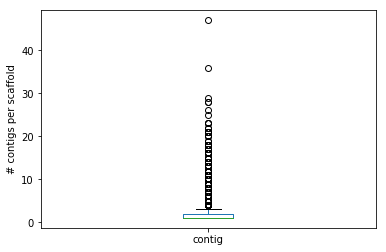

>my_scaff
ATAATANNNTTTNNNCC

>my_scaff2
TATTTTTATATGTATGTAATNNNNNNNNNNTTTATATATA


>scaffold3
NNNNNNNNNNNNNNNNNNNNCCCCGGAGGTACCTCCGGGGCCCCGGAGGT


In [4]:
"""Solution to exercise2"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Bio import SeqIO


def computeStats(filename, show_output = True):
    sInfo = pd.read_csv(filename, sep="\t", header = 0)
    if show_output:
        print("The file contains {} entries".format(sInfo.shape[0]))
        scaffolds = sInfo["ScaffID"].unique()
        print("... {} scaffolds".format(scaffolds.shape[0]))
        contigs = sInfo[sInfo["type"] == "W"]
        c_sizes = contigs["c_end"].astype(int) - contigs["c_start"].astype(int)
        print("... {} contigs (tot. size: {:,} bases)".format(contigs.shape[0],
                                                        np.sum(c_sizes)))
        gaps = sInfo[sInfo["type"] == "N"]
        print("... and {} gaps (tot. size: {:,} bases)".format(gaps.shape[0],
                                                        np.sum(gaps["contig"].astype(int))))

        cont_by_scaff = contigs.groupby("ScaffID").aggregate(pd.DataFrame.count)['contig']
        #print(cont_by_scaff)
        cont_by_scaff.plot(kind = 'box')
        plt.ylabel("# contigs per scaffold")
        plt.show()
    return sInfo

def printSequence(scaffInfo, scafID, sequenceFile):
    scaff = scaffInfo[scaffInfo["ScaffID"] == scafID]
    hdr = ">" + scafID
    seq = ""
    if len(scaff) > 0:
        seqDict = SeqIO.to_dict(SeqIO.parse(sequenceFile, "fasta"))

        for entry in range(len(scaff)):
            entry_data = scaff.iloc[entry]
            if entry_data["type"] == "N":
                seq += "N" * int(entry_data["contig"])
            elif entry_data["type"] == "W":
                ctg = entry_data["contig"]
                if not ctg in seqDict:
                    print("Warning: contig {} not present. Exiting...".format(ctg))
                    break
                else:
                    c_s = int(entry_data["c_start"])
                    c_e = int(entry_data["c_end"])
                    c_strand = entry_data["c_strand"]
                    t_s = seqDict[ctg][c_s -1: c_e ]
                    if c_strand == "-":
                        t_s = t_s.reverse_complement()
                    seq += t_s.seq
    if len(seq) > 0:
        print(hdr)
        print(seq)
    else:
        print("Warning: scaffold {} not present".format(scafID))

fn = "data_reduced.agp"
scaffDF = computeStats(fn)
scaffDF = computeStats("small.agp", show_output = False)
printSequence(scaffDF,"my_scaff","small_seq.fasta")
print("")
printSequence(scaffDF,"my_scaff2","small_seq.fasta")
print("")
printSequence(scaffDF,"my_other_scaff","small_seq.fasta")
print("")
printSequence(scaffDF,"scaffold3","small_seq.fasta")

</div>